Flujo a traves del rectangulo (1,1),(1,-1),(-1,-1),(-1,1) centrado en el origen, probar que el sistema dx/dt=-y+xcos(pix), dy/dt=x-y^3 tiene ciclo limite. Graficar el campo vectorial, ciclo limite y el cuadrado

In [8]:
from sympy import *
from sympy.abc import x,y,t
from sympy import cos, pi

In [24]:
#puntos criticos
P=x*cos(x*pi)-y
Q=x-y**3
#establecer P(x,y)=0 y Q(x,y)=0
Peqn=Eq(P,0)
Qeqn=Eq(Q,0)
print(solve((Peqn,Qeqn),x,y))
#el punto critico es 0,0 pero por alguna razon esta cosa no lo resuelve :/

NotImplementedError: could not solve y**3*cos(pi*y**3) - y

In [23]:
#matriz Jacobiana
J11=diff(P,x)
J12=diff(P,y)
J21=diff(Q,x)
J22=diff(Q,y)
J=Matrix([[J11,J12],[J21,J22]])
pprint(J)

⎡-π⋅x⋅sin(π⋅x) + cos(π⋅x)   -1  ⎤
⎢                               ⎥
⎢                              2⎥
⎣           1              -3⋅y ⎦


In [25]:
#J en el punto critico
Jc1=J.subs([(x,0),(y,0)])
print(Jc1.eigenvals())
#pprint(Jc1.eigenvects())

{1/2 - sqrt(3)*I/2: 1, 1/2 + sqrt(3)*I/2: 1}


En el punto critico (0,0) los eigenvalores son complejos, con alfa>0 por lo que es un foco inestable.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import pylab as pl

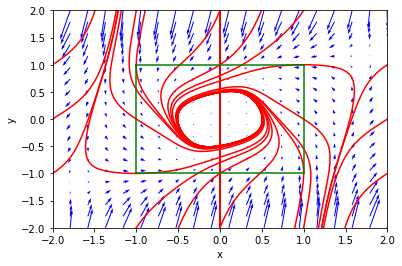

In [3]:
#sistema 2D no lineal
def dx_dt(x,t):
    return [ -x[1]+x[0]*np.cos(np.pi*x[0]) , x[0]-x[1]**3 ]
#trayectorias en tiempo hacia adelante
ts=np.linspace(0,10,500)
ic=np.linspace(-2,2,5)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#trayectorias en tiempo hacia atras
ts=np.linspace(0,-10,500)
ic=np.linspace(-2,2,5)
for r in ic:
    for s in ic:
        x0=[r,s]
        xs=odeint(dx_dt,x0,ts)
        plt.plot(xs[:,0],xs[:,1],"r-")
#etiquetas de ejes y estilo de letra
plt.xlabel('x',fontsize=10)
plt.ylabel('y',fontsize=10)
plt.tick_params(labelsize=10)
plt.xlim(-2,2)
plt.ylim(-2,2)
#campo vectorial
X,Y=np.mgrid[-2:2:20j,-2:2:20j]
u=-Y+X*np.cos(np.pi*X)
v=X-Y**3
pl.quiver(X,Y,u,v,color='b')
#agregando el rectangulo
x1=np.linspace(-1,1)
x2=np.linspace(-1,1)
plt.plot(x1,[1 for x in x1],'g')
plt.plot(x2,[-1 for x in x2],'g')
plt.axvline(x=1, ymin=0.25, ymax=0.75,color='g')
plt.axvline(x=-1, ymin=0.25, ymax=0.75,color='g')

Dentro del cuadrado solamente se encuentra un punto critico el cual es el origen, el cual es un foco inestable. En y=1 con x<=1, dy=x-1<=0 el flujo va de arriba hacia abajo. En y=-1 con x<=1, dy=x+1>0 por lo que el flujo va hacia arriba. En x=1 con y<=1, dx=-y-1<0 por lo que el flujo va de derecha a izquierda. En x=-1 con y<=1, dx=-y+1>0 por lo que el flujo va de izquierda a derecha. Ya que el flujo ingresa, el cuadratdo es invariante positivo.
Si se utiliza una region anular donde se excluye el punto critico, y ya que el cuadrado es un set invariante positivo por el corolario del teorema de Poincare-Bendixson existe un ciclo limite contenido en el cuadrado.